In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

# Reading and Understanding Data.

In [78]:
crime_rates = pd.read_csv("crime_data.csv", index_col=0)
crime_rates.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [79]:
crime_rates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [80]:
crime_rates.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [81]:
crime_rates.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


# Standardize the Data

In [82]:
#standardize the data to normal distribution
from sklearn import preprocessing

crime_rates_standardized = preprocessing.scale(crime_rates)

crime_rates_standardized = pd.DataFrame(crime_rates_standardized)
crime_rates_standardized.head()

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


# Scree Plot

Used to determine the clusters.

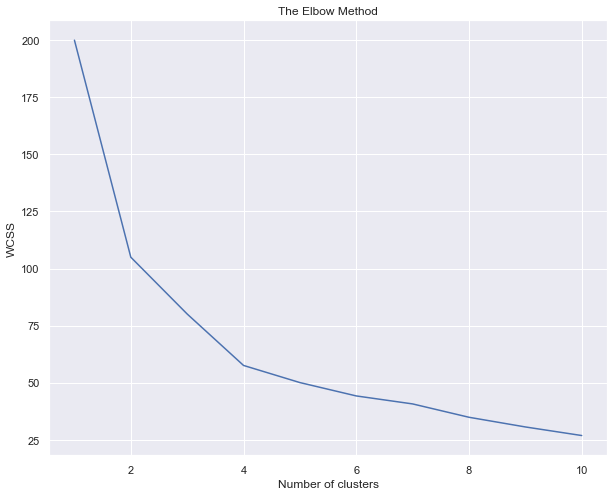

In [83]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(crime_rates_standardized)
    wcss.append(kmeans.inertia_) #criterion based on which K-means clustering works. Inertia is WCSS
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The scree plot levels off at k=4 and let's use it to determine the clusters.

In [84]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(crime_rates_standardized) #observations belongs to which cluster.

y_kmeans

array([0, 3, 3, 0, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1, 3,
       2, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 2, 1])

In [85]:
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1 = y_kmeans+1

# New list called cluster
cluster = list(y_kmeans1)

# Adding cluster to our data set
crime_rates['cluster'] = cluster

crime_rates.head()

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,4
Arizona,8.1,294,80,31.0,4
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,4


In [86]:
#Mean of clusters 1 to 4
kmeans_mean_cluster = pd.DataFrame(round(crime_rates.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Murder,Assault,UrbanPop,Rape
cluster,,,,
1,13.9,243.6,53.8,21.4
2,5.7,138.9,73.9,18.8
3,3.6,78.5,52.1,12.2
4,10.8,257.4,76.0,33.2


# Cluster Analysis

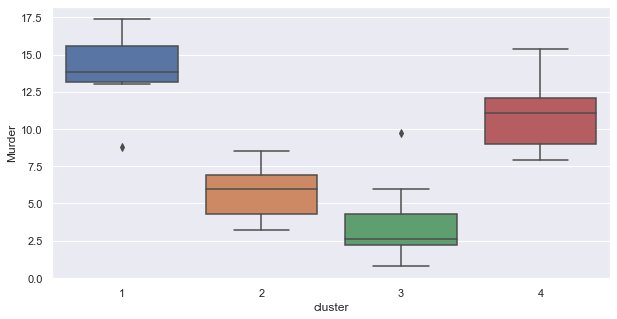

In [87]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster', y='Murder', data=df)

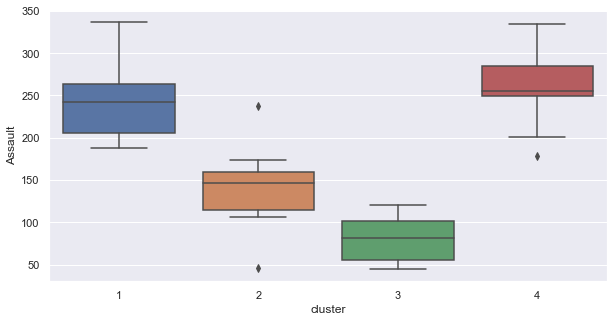

In [88]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster', y='Assault', data=df)

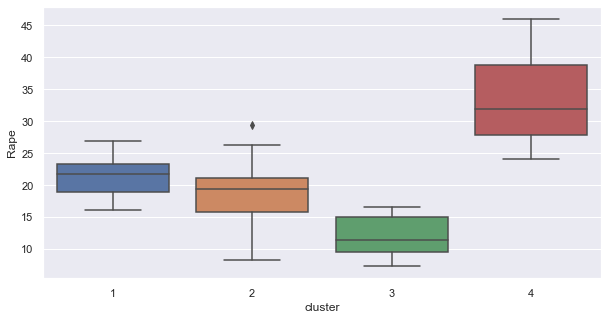

In [89]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster', y='Rape', data=df)

**Observations:**

<li>The Cities in Cluster-3 seems to have less crime rates when compared to other zones and can be called as Safe-Zone
<li>The Cities in Cluster-2 seems to have relatively less crime rates when compared to 1st and 4th and can be regarded as Moderate-Zone.
<li>The Cities in the Cluster-1 and 4 seems to be in the Danger-Zone where the crime rates is high.

## Finding Safe, Moderate and Danger Zones.

In [90]:
Danger_Zone = crime_rates[crime_rates['cluster']==1]
Danger_Zone

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,1
Arkansas,8.8,190,50,19.5,1
Georgia,17.4,211,60,25.8,1
Louisiana,15.4,249,66,22.2,1
Mississippi,16.1,259,44,17.1,1
North Carolina,13.0,337,45,16.1,1
South Carolina,14.4,279,48,22.5,1
Tennessee,13.2,188,59,26.9,1


In [91]:
Moderate_Zone = crime_rates[crime_rates['cluster']==2]
Moderate_Zone

,Murder,Assault,UrbanPop,Rape,cluster
Connecticut,3.3,110,77,11.1,2
Delaware,5.9,238,72,15.8,2
Hawaii,5.3,46,83,20.2,2
Indiana,7.2,113,65,21.0,2
Kansas,6.0,115,66,18.0,2
Massachusetts,4.4,149,85,16.3,2
New Jersey,7.4,159,89,18.8,2
Ohio,7.3,120,75,21.4,2
Oklahoma,6.6,151,68,20.0,2
Oregon,4.9,159,67,29.3,2


In [92]:
Safe_Zone = crime_rates[crime_rates['cluster']==3]
Safe_Zone

,Murder,Assault,UrbanPop,Rape,cluster
Idaho,2.6,120,54,14.2,3
Iowa,2.2,56,57,11.3,3
Kentucky,9.7,109,52,16.3,3
Maine,2.1,83,51,7.8,3
Minnesota,2.7,72,66,14.9,3
Montana,6.0,109,53,16.4,3
Nebraska,4.3,102,62,16.5,3
New Hampshire,2.1,57,56,9.5,3
North Dakota,0.8,45,44,7.3,3
South Dakota,3.8,86,45,12.8,3


In [93]:
Danger_Zone2= crime_rates[crime_rates['cluster']==4]
Danger_Zone2

,Murder,Assault,UrbanPop,Rape,cluster
Alaska,10.0,263,48,44.5,4
Arizona,8.1,294,80,31.0,4
California,9.0,276,91,40.6,4
Colorado,7.9,204,78,38.7,4
Florida,15.4,335,80,31.9,4
Illinois,10.4,249,83,24.0,4
Maryland,11.3,300,67,27.8,4
Michigan,12.1,255,74,35.1,4
Missouri,9.0,178,70,28.2,4
Nevada,12.2,252,81,46.0,4


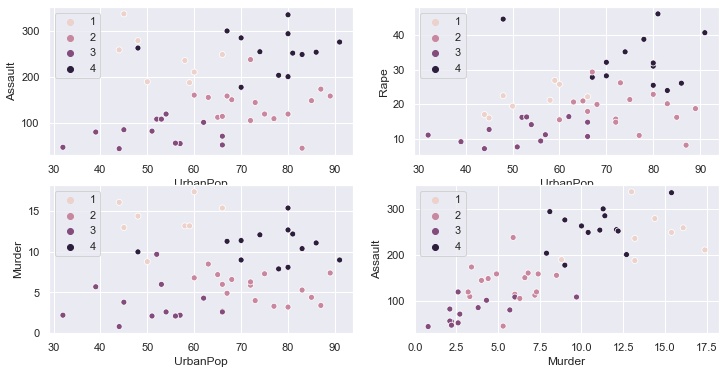

In [113]:
import seaborn as sns

f, axes = plt.subplots(2,2, figsize=(12,6))
sns.scatterplot(x=crime_rates['UrbanPop'], y = crime_rates['Assault'],hue=y_kmeans1, ax = axes[0,0])
sns.scatterplot(x=crime_rates['UrbanPop'], y = crime_rates['Rape'],hue=y_kmeans1, ax = axes[0,1])
sns.scatterplot(x=crime_rates['UrbanPop'], y = crime_rates['Murder'],hue=y_kmeans1, ax = axes[1,0])
sns.scatterplot(x=crime_rates['Murder'], y = crime_rates['Assault'],hue=y_kmeans1, ax = axes[1,1])

The above scatter shows a distribution of how the states are scattered and clusters are visible based on Murders, Rape and Assaults. And there is a positive correlation between occurrence of Murder and Assault in different states.

# Insights 


</Br></Br><li>Cluster 3 - south western states maxes out in three out of four crimes (Assault, Urbanpop, Rape).
<li>Cluster 4 stands out for minimum crime rate as the means of 3 crimes are least relative to other crimes
<li>Coincidentally, most of the states belong to cluster 2 where Murders seems to be popular.
<li>The states in cluster 4 have more number of average arrests/ 100,000 persons in all the three crime categories than states in cluster 2 in spite of the average Urbanpop (%) being very close. 